In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [74]:
img1 = cv2.imread('sIMG_8253.jpg', 0)
img2 = cv2.imread('sIMG_8254.jpg', 0)
img3 = cv2.imread('sIMG_8255.jpg', 0)
img4 = cv2.imread('sIMG_8256.jpg', 0)

imgs = [img1, img2, img3, img4]

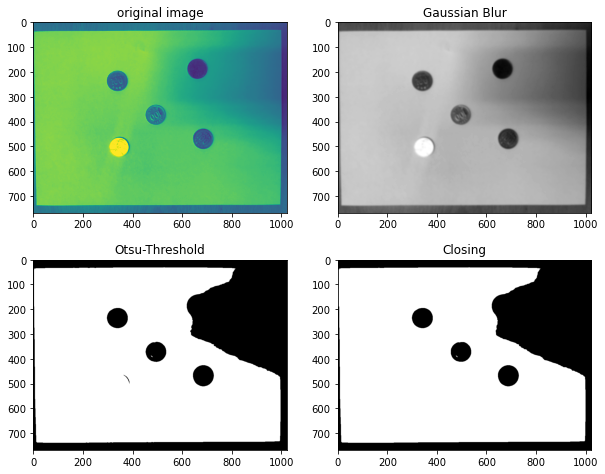

In [35]:
img = img1
s = 15

blur = cv2.GaussianBlur(img, (s,s), 0)
ret,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel, iterations=4)

plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(img), plt.title('original image')
plt.subplot(222), plt.imshow(blur, 'gray'), plt.title('Gaussian Blur')
plt.subplot(223), plt.imshow(th1, 'gray'), plt.title('Otsu-Threshold')
plt.subplot(224), plt.imshow(closing, 'gray'), plt.title('Closing')
plt.show()

# Since image has no clear gray-scale difference between background and coins, 
# Gaussian blur as well as otsu-threshold is not perfoming well.

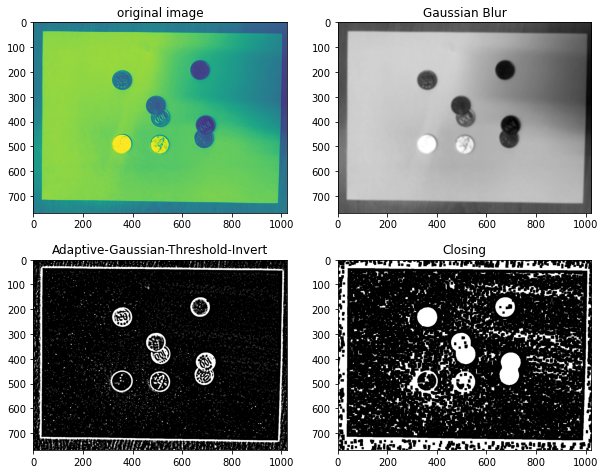

In [46]:
img = img2
s = 15

blur = cv2.GaussianBlur(img, (s,s), 0)
th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel, iterations=4)

plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(img), plt.title('original image')
plt.subplot(222), plt.imshow(blur, 'gray'), plt.title('Gaussian Blur')
plt.subplot(223), plt.imshow(th2, 'gray'), plt.title('Adaptive-Gaussian-Threshold-Invert')
plt.subplot(224), plt.imshow(closing, 'gray'), plt.title('Closing')
plt.show()

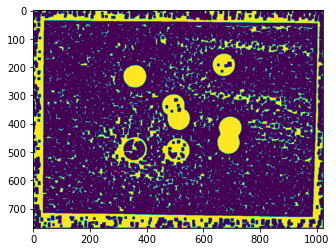

In [69]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 1)
    
plt.imshow(cont_img)
plt.show()

# Since I'm drawing contour at image, I removed for loop
# I think contour without closing would be better to img2

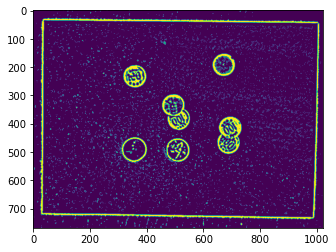

In [70]:
cont_img = th2.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 1)
    
plt.imshow(cont_img)
plt.show()

# Has less noise but numbers in coin also has contour

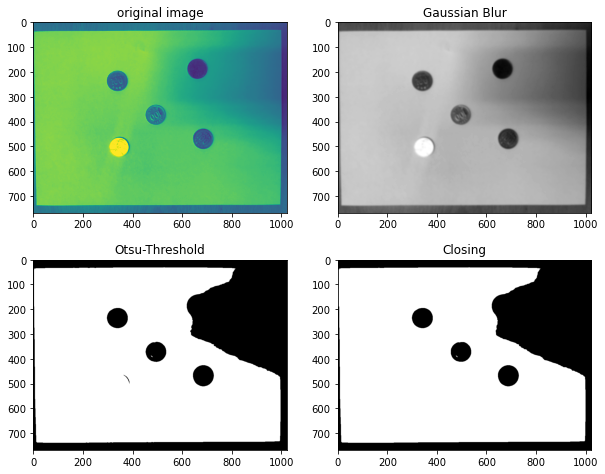

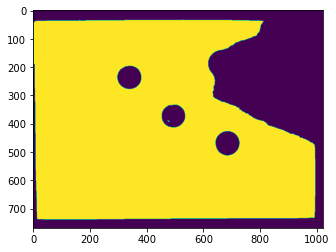

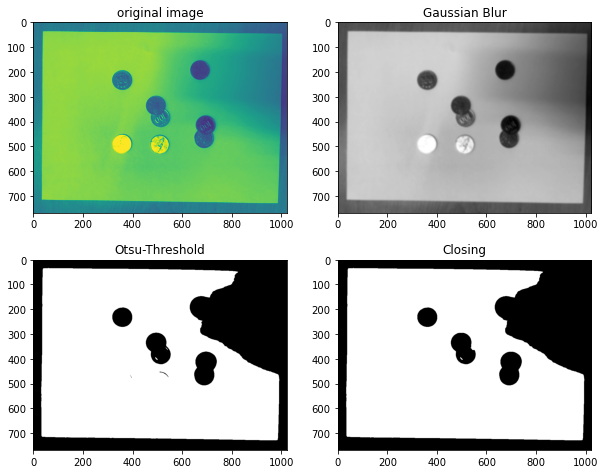

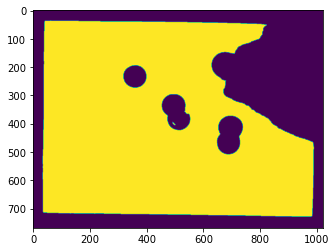

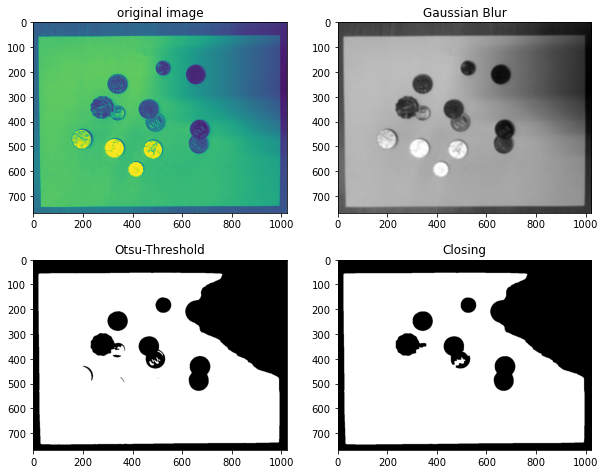

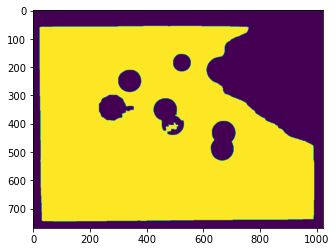

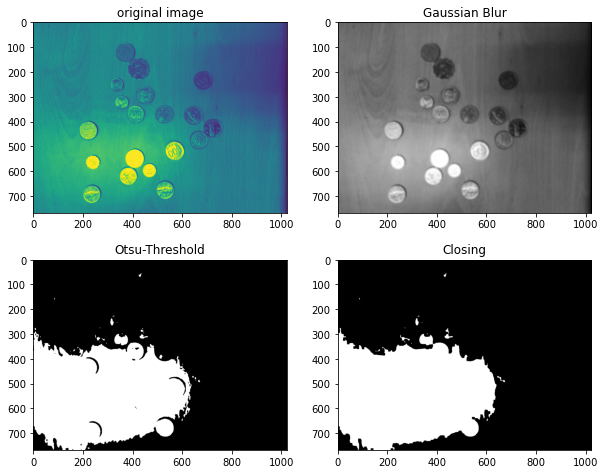

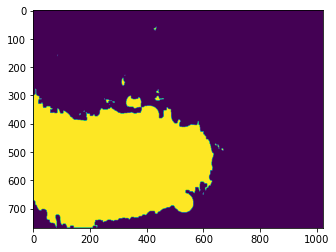

In [75]:
# HW

for img in imgs :

    s = 15

    blur = cv2.GaussianBlur(img, (s,s), 0)
    ret,th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel, iterations=4)

    cont_img = closing.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 1)

    plt.figure(figsize=(10, 8))
    plt.subplot(221), plt.imshow(img), plt.title('original image')
    plt.subplot(222), plt.imshow(blur, 'gray'), plt.title('Gaussian Blur')
    plt.subplot(223), plt.imshow(th1, 'gray'), plt.title('Otsu-Threshold')
    plt.subplot(224), plt.imshow(closing, 'gray'), plt.title('Closing')
    plt.show()

    plt.imshow(cont_img)
    plt.show()